In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
#pd.set_option('html', False)
from IPython import display

#matplotlib
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime

from scipy.stats import stats

xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
#months = {1:'jun', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC_contaminantes/cca/"
path2pollutants = "../datos/contaminantes/2015/CCA/"

path2estaciones = "../datos/loc_estaciones/air_quality_stn.xy"
estaciones = pd.read_table(path2estaciones, index_col=0, names=['long','lat', 'height'])
estaciones = estaciones.transpose().to_dict()
estaciones['CCA']

months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct':'10', 'nov':'11', 'dic': '12'}

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


In [4]:
from scipy.interpolate import SmoothBivariateSpline

In [5]:
apr = pd.read_csv(path2datosVC + 'apr_vc_contaminantes_cca.csv', index_col=0)
oct = pd.read_csv(path2datosVC + 'oct_vc_contaminantes_cca.csv', index_col=0)

In [6]:
may = pd.read_csv(path2datosVC + 'may_vc_contaminantes_cca.csv', index_col=0)

In [7]:
dic = pd.read_csv(path2datosVC + 'dic_vc_contaminantes_cca.csv', index_col=0)

In [8]:
apr.head()

,VC_24,pblh_24,u_mean_24,o3,co,pm25
2015-04-01 00:00:00,NaN,NaN,NaN,36.0,0.5,14.0
2015-04-01 01:00:00,NaN,NaN,NaN,34.0,0.4,16.0
2015-04-01 02:00:00,NaN,NaN,NaN,22.0,0.5,17.0
2015-04-01 03:00:00,NaN,NaN,NaN,11.0,0.5,16.0
2015-04-01 04:00:00,NaN,NaN,NaN,8.0,0.5,19.0


In [9]:
def f(x):
    return 6000/x

In [10]:
x_range = np.linspace(0.1, 4000, 100)

(-100, 4000)

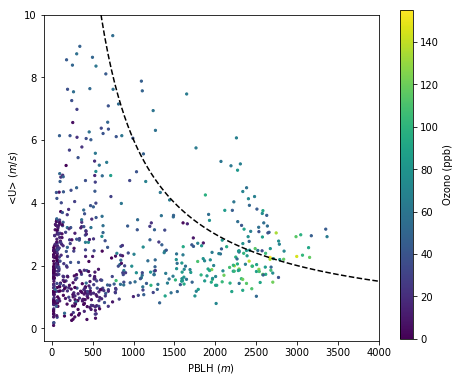

In [13]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.scatter(apr['pblh_24'], apr['u_mean_24'], c = apr['o3'], s = 5)
ax.plot(x_range, f(x_range), '--k')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 4000)


interpolando

In [15]:
import matplotlib.mlab as mlab

In [16]:
apr.dropna(subset=['pblh_24', 'o3']);

In [17]:
xmin, xmax = apr['pblh_24'].min(), apr['pblh_24'].max()
ymin, ymax = apr['u_mean_24'].min(), apr['u_mean_24'].max()

In [18]:
xmax

3368.28

In [19]:
ny, nx = 512, 512
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)

In [20]:
VC_grid = xi*yi

(-100, 3500)

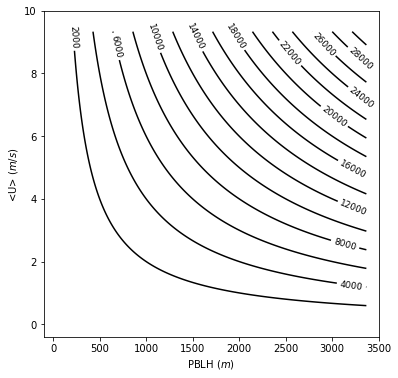

In [21]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 500)
#im = ax.scatter(apr['pblh_24'], apr['u_mean_24'], c = apr['o3'], s = 10)3
#ax.plot(x_range, f(x_range), '--k')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
#cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
#cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


# O3

### - Abril

In [22]:
x = apr.dropna(subset=['pblh_24', 'o3'])['pblh_24']
y = apr.dropna(subset=['pblh_24', 'o3'])['u_mean_24']
z = apr.dropna(subset=['pblh_24', 'o3'])['o3']

In [35]:
zi = mlab.griddata(x,y,z,xi,yi, interp='nearest')

/Users/claudiopierard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  """Entry point for launching an IPython kernel.


ValueError: interp keyword must be one of 'linear' (for linear interpolation) or 'nn' (for natural neighbor interpolation).  Default is 'nn'.

In [ ]:
zz = 

(-100, 3468)

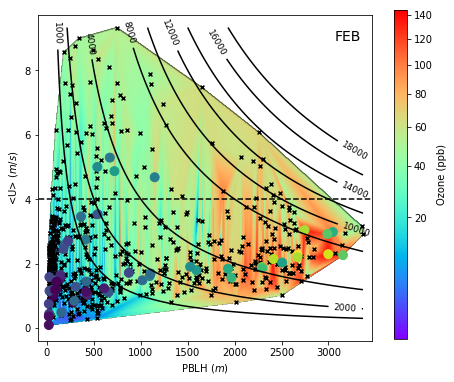

In [31]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi, shading= 'gouraud', norm= colors.PowerNorm(gamma=1/2), cmap = 'rainbow')
#ax.contourf(xi,yi,zi)
vc_levels = [500, 1000, 2000, 4000, 6000,10000, 12000, 14000, 16000]
ax.scatter(apr['pblh_24'], apr['u_mean_24'], s = 15, marker = 'x', color = 'k')
ax.scatter(apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['pblh_24'], apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['u_mean_24'], s = 80, c = apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['o3'], marker = 'o')

ax.axhline(4, -100, 3500, c = 'k', linestyle = 'dashed')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 8000, 10000, 12000, 14000, 16000, 18000])
#ax.contour(xi,yi,VC_grid, colors='k', levels=[6000], linestyle = 'dashed')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax.text(xmax-300, ymax - 0.4, "FEB", fontsize = 14)

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozone (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, (9.33 + 0.4))
ax.set_xlim(-100, 3468)


In [19]:
s = 'feb'

In [20]:
'ahuevo'.upper()

'AHUEVO'

In [21]:
cont_may = [[pd.to_datetime('2015-05-05 16:00:00'), pd.to_datetime('2015-05-06 18:00:00')], [pd.to_datetime('2015-05-09 16:00:00'), pd.to_datetime('2015-05-10 18:00:00')]]


In [22]:
cont_apr = [[pd.to_datetime('2015-04-08 16:00:00'), pd.to_datetime('2015-04-10 18:00:00')]]

In [23]:
cont_apr[][1]

SyntaxError: invalid syntax (<ipython-input-23-af66db35be8c>, line 1)

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi, shading= 'gouraud')
#ax.contourf(xi,yi,zi)
vc_levels = [500, 1000, 2000, 4000, 6000,10000, 12000, 14000, 16000]
ax.scatter(apr['pblh_24'], apr['u_mean_24'], s = 15, marker = 'x', color = 'k')
ax.scatter(apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['pblh_24'], apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['u_mean_24'], s = 80, c = apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['o3'], marker = 'o')

ax.axhline(4, -100, 3500, c = 'k', linestyle = 'dashed')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


# griddata interpolation

In [ ]:
import numpy.ma as ma

In [ ]:
points =apr.dropna(subset=['pblh_24', 'o3'])[['pblh_24','u_mean_24']].values

In [ ]:
values = z.values

In [ ]:
(xi.T, yi.T);

In [ ]:
zi = interpolate.griddata(points, values, (xi.T, yi.T), method='linear')

In [ ]:
zi = interpolate.griddata(points, values, (xi.T, yi.T), method='nearest')

In [24]:
zi = ma.masked_where(np.isnan(zi),zi)

NameError: name 'ma' is not defined

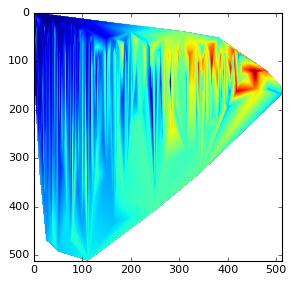

In [25]:
plt.imshow(zi)

(-100, 3500)

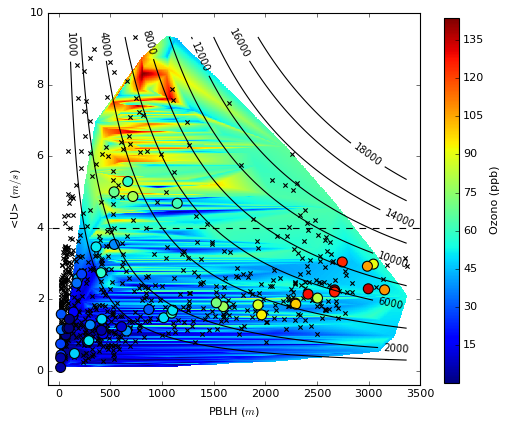

In [26]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi.T)
#ax.contourf(xi,yi,zi)
vc_levels = [500, 1000, 2000, 4000, 6000,10000, 12000, 14000, 16000]
ax.scatter(apr['pblh_24'], apr['u_mean_24'], s = 15, marker = 'x', color = 'k')
ax.scatter(apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['pblh_24'], apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['u_mean_24'], s = 80, c = apr['2015-04-08 16:00:00':'2015-04-10 18:00:00']['o3'], marker = 'o')

ax.axhline(4, -100, 3500, c = 'k', linestyle = 'dashed')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


............

-----------

In [27]:
x = may.dropna(subset=['pblh_24', 'o3'])['pblh_24']
y = may.dropna(subset=['pblh_24', 'o3'])['u_mean_24']
z = may.dropna(subset=['pblh_24', 'o3'])['o3']

In [28]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

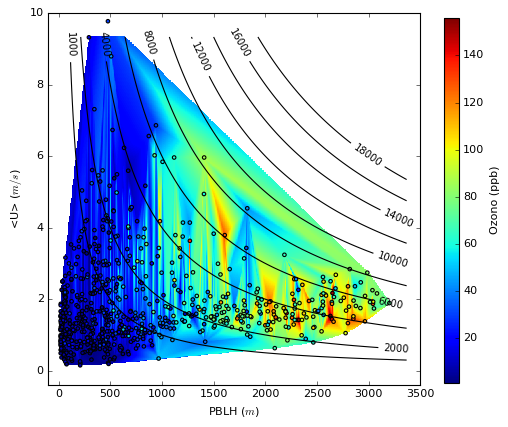

In [29]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
im = ax.scatter(may['pblh_24'], may['u_mean_24'], c = may['o3'], s = 10)
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


### - Octubre

In [30]:
x = oct.dropna(subset=['pblh_24', 'o3'])['pblh_24']
y = oct.dropna(subset=['pblh_24', 'o3'])['u_mean_24']
z = oct.dropna(subset=['pblh_24', 'o3'])['o3']

In [31]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

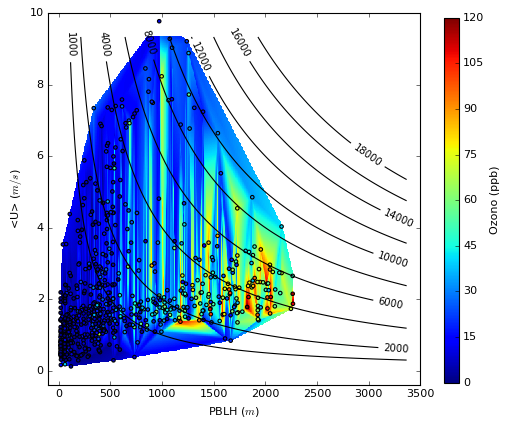

In [32]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
im = ax.scatter(oct['pblh_24'], oct['u_mean_24'], c = oct['o3'], s = 10)
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


# CO

### - Apr

In [33]:
x = apr.dropna(subset=['pblh_24', 'co'])['pblh_24']
y = apr.dropna(subset=['pblh_24', 'co'])['u_mean_24']
z = apr.dropna(subset=['pblh_24', 'co'])['co']

In [34]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

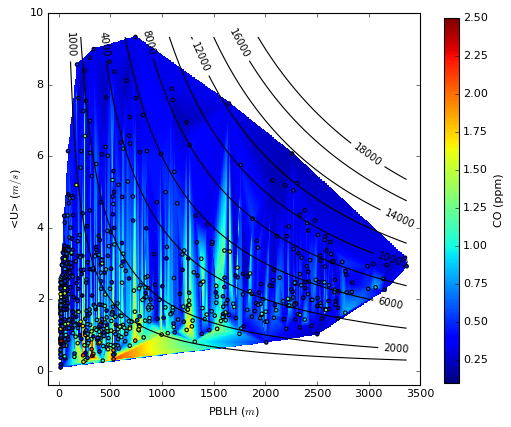

In [35]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
im = ax.scatter(x,y, c = z, s = 10)
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('CO (ppm)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


### - Octubre

In [36]:
x = oct.dropna(subset=['pblh_24', 'co'])['pblh_24']
y = oct.dropna(subset=['pblh_24', 'co'])['u_mean_24']
z = oct.dropna(subset=['pblh_24', 'co'])['co']

In [37]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 2500)

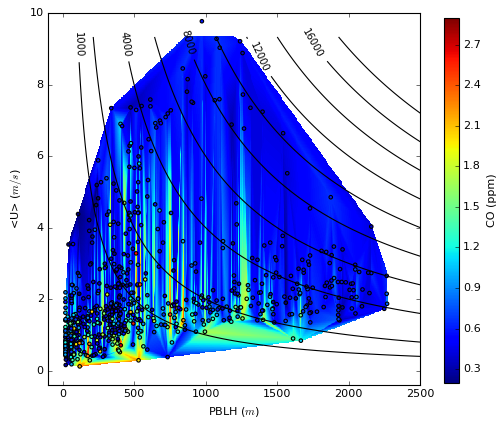

In [38]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
im = ax.scatter(x,y, c = z, s = 10)
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('CO (ppm)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 2500)


# PM 2.5

### - Abril

In [39]:
x = apr.dropna(subset=['pblh_24', 'pm25'])['pblh_24']
y = apr.dropna(subset=['pblh_24', 'pm25'])['u_mean_24']
z = apr.dropna(subset=['pblh_24', 'pm25'])['pm25']

In [40]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

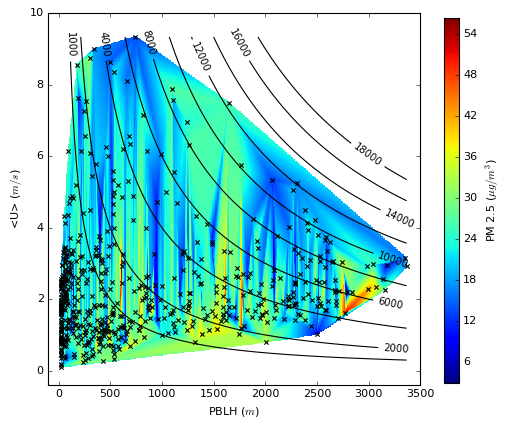

In [41]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
ax.scatter(x,y, c ='k', s = 15, marker = 'x')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('PM 2.5 ($\mu g /m^3$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


### - Octubre

In [42]:
x = oct.dropna(subset=['pblh_24', 'pm25'])['pblh_24']
y = oct.dropna(subset=['pblh_24', 'pm25'])['u_mean_24']
z = oct.dropna(subset=['pblh_24', 'pm25'])['pm25']

In [43]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

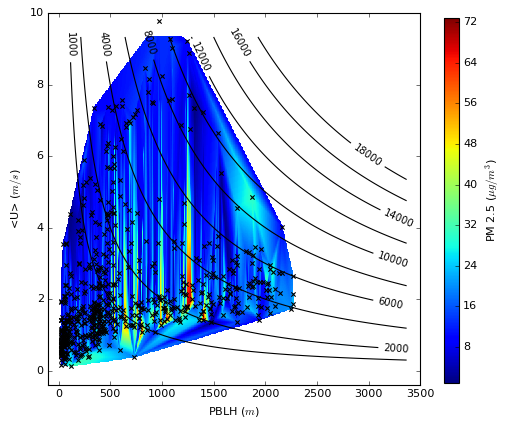

In [44]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
ax.scatter(x,y, c = 'k', s = 15, marker='x')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('PM 2.5 ($\mu g /m^3$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


### - Diciembre

In [45]:
x = dic.dropna(subset=['pblh_24', 'pm25'])['pblh_24']
y = dic.dropna(subset=['pblh_24', 'pm25'])['u_mean_24']
z = dic.dropna(subset=['pblh_24', 'pm25'])['pm25']

In [46]:
zi = mlab.griddata(x,y,z,xi,yi, interp='linear')

(-100, 3500)

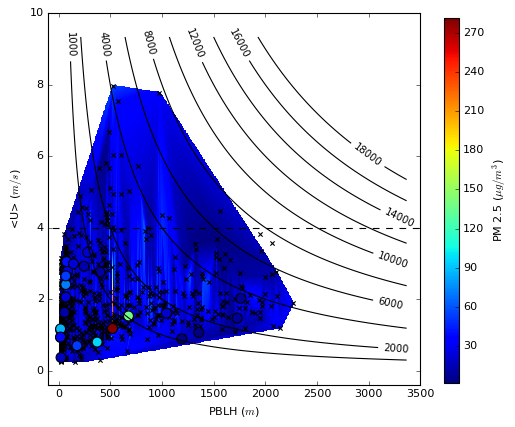

In [47]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi)
vc_levels = [500, 1000, 2000, 4000, 6000,10000, 12000, 14000, 16000]
ax.scatter(dic['pblh_24'], dic['u_mean_24'], s = 15, marker = 'x', color = 'k')
ax.scatter(dic['2015-12-25 00:00:00':'2015-12-25 23:00:00']['pblh_24'], dic['2015-12-25 00:00:00':'2015-12-25 23:00:00']['u_mean_24'], s = 80, c = dic['2015-12-25 00:00:00':'2015-12-25 23:00:00']['pm25'], marker = 'o')

ax.axhline(4, -100, 3500, c = 'k', linestyle = 'dashed')
#ax.plot(x_range, f(x_range), '--k')
CS = ax.contour(xi,yi,VC_grid, colors='k', levels=[1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('PM 2.5 ($\mu g /m^3$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 10)
ax.set_xlim(-100, 3500)


## Countour VC

In [57]:
marzo = pd.read_csv('../datos/dataframes_VC_contaminantes/cca/mar_vc_contaminantes_cca.csv', index_col=0)
marzo.index = pd.to_datetime(marzo.index)

In [61]:
marzo

                     VC_24  pblh_24  u_mean_24     o3   co  pm25
2015-03-01 00:00:00    927   236.96       3.91    4.0  0.7  13.0
2015-03-01 01:00:00     88    65.95       1.35    NaN  NaN  18.0
2015-03-01 02:00:00    132    94.20       1.37    NaN  NaN  15.0
2015-03-01 03:00:00     17    66.23       0.32    8.0  0.4  10.0
2015-03-01 04:00:00    118    83.80       1.44    2.0  0.5  11.0
2015-03-01 05:00:00    140    87.28       1.62    2.0  0.6  12.0
2015-03-01 06:00:00     22    25.91       0.87    2.0  0.5  14.0
2015-03-01 07:00:00      4    22.66       0.16    7.0  0.4  11.0
2015-03-01 08:00:00     62   101.83       0.62    2.0  1.0  15.0
2015-03-01 09:00:00    221   338.40       0.66   11.0  0.9  12.0
2015-03-01 10:00:00    512   484.60       1.06   26.0  1.0  13.0
2015-03-01 11:00:00    831   760.91       1.09   48.0  0.7  25.0
2015-03-01 12:00:00   1580  1209.37       1.31   66.0  0.6  24.0
2015-03-01 13:00:00   2320  1472.31       1.58   84.0  0.6  25.0
2015-03-01 14:00:00   253

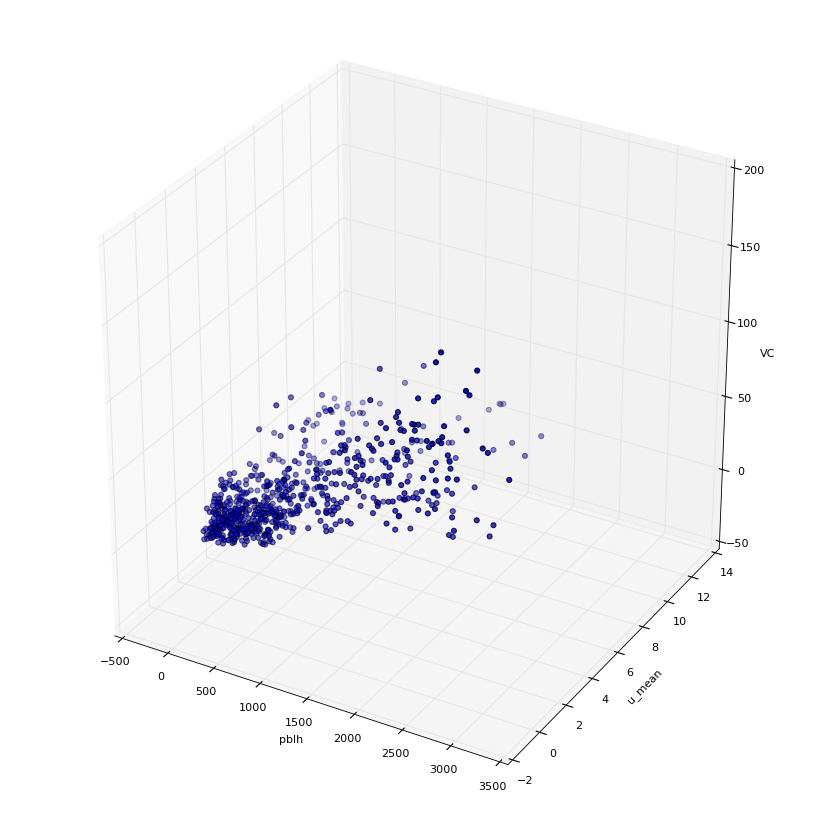

In [60]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.scatter(marzo['pblh_24'], marzo['u_mean_24'] , marzo['pm'])
#ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


In [48]:
ny, nx = 512, 512
xi = np.linspace(-xmax, xmax, nx)
yi = np.linspace(-ymax, ymax, ny)
xi, yi = np.meshgrid(xi, yi)
VC_grid = xi*yi

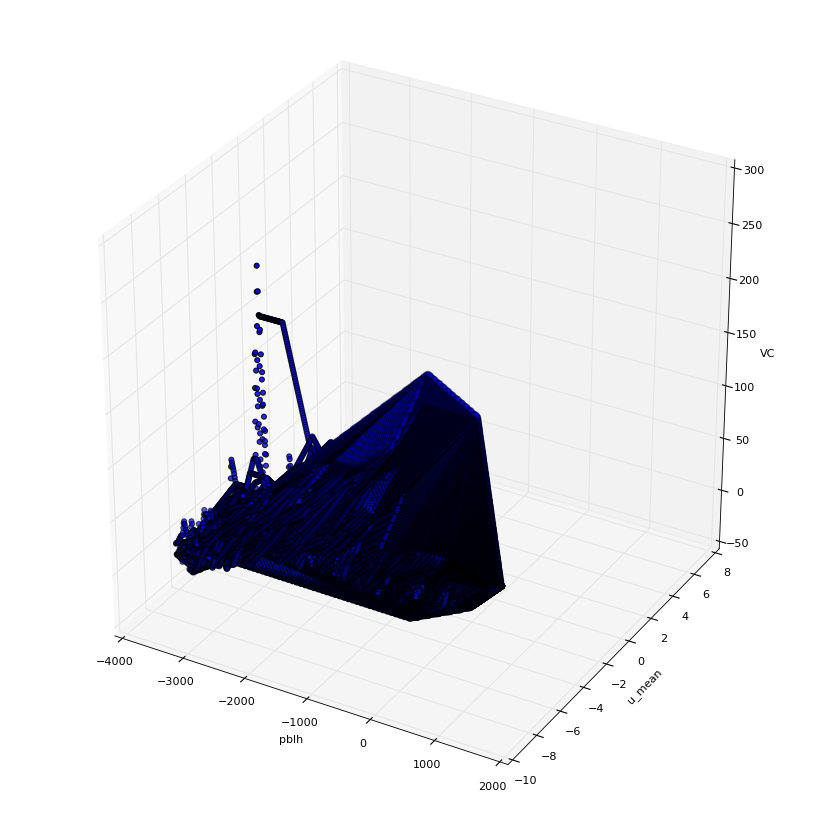

In [51]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.scatter(xi,yi,zi)
#ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


AttributeError: 'Axes3DSubplot' object has no attribute 'surface'

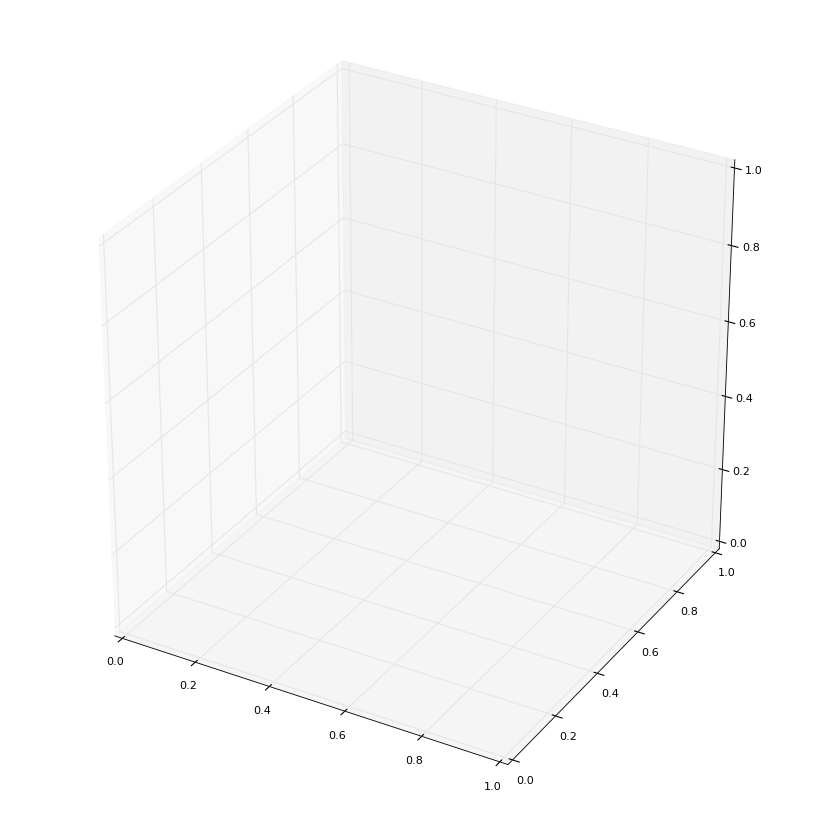

In [50]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.surface(apr['pblh_24'], apr['u_mean_24'], apr['o3'], label='parametric curve')
ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


In [53]:
mayo = pd.read_csv(path2datosVC, index_col=0)
mayo.index = pd.to_datetime(mayo.index)

ValueError: No columns to parse from file

In [54]:
mayo.head()

NameError: name 'mayo' is not defined

In [4]:
mayo_adim = mayo

In [5]:
mayo_adim.VC_24.mean()

1623.6048387096773

In [6]:
mayo_adim.VC_24 = mayo_adim.VC_24/mayo_adim.VC_24.mean()
mayo_adim.pblh_24 = mayo_adim.pblh_24/mayo_adim.pblh_24.mean()
mayo_adim.u_mean_24 = mayo_adim.u_mean_24/mayo_adim.u_mean_24.mean()

In [7]:
mayo_adim.pblh_24.min()

0.023199529925438989

NameError: name 'mayo' is not defined

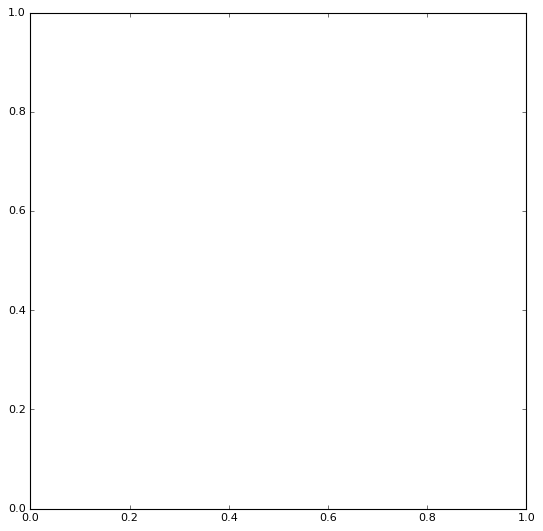

In [52]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)
ax.scatter(mayo['pblh_24'], mayo['u_mean_24'])
ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')


plt.show()


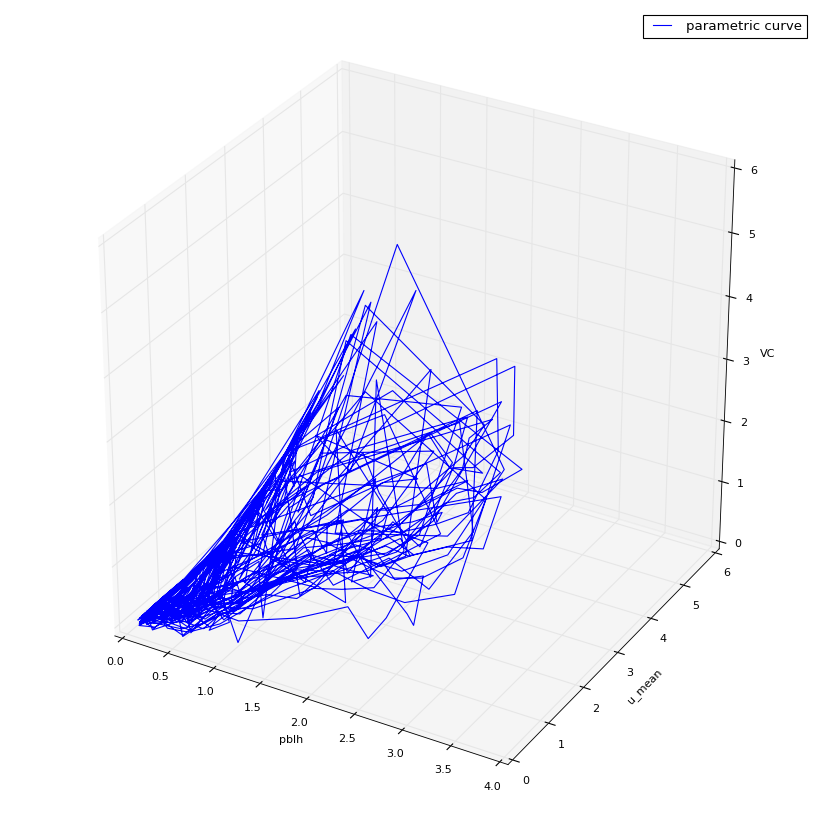

In [28]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.plot(mayo['pblh_24'], mayo['u_mean_24'], mayo['VC_24'], label='parametric curve')
ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


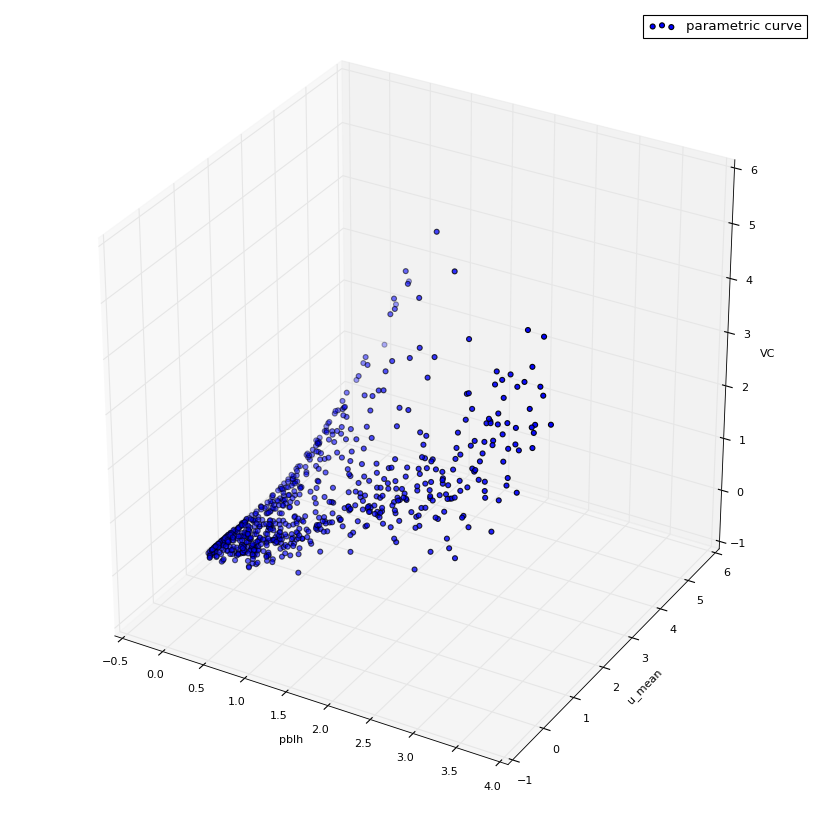

In [29]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.scatter(mayo['pblh_24'], mayo['u_mean_24'], mayo['VC_24'], label='parametric curve')
ax.legend()
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


# Interpolando

In [30]:
new_index = pd.date_range('2015-05-01', '2015-05-31', freq='10min')

In [31]:
mayo_adim = mayo.reindex(new_index)

In [32]:
mayo_adim = mayo_adim.interpolate(method= 'time')

In [33]:
mayo_adim

                        VC_24   pblh_24  u_mean_24
2015-05-01 00:00:00  0.030180  0.044499   0.701675
2015-05-01 00:10:00  0.042703  0.052362   0.781562
2015-05-01 00:20:00  0.055227  0.060225   0.861448
2015-05-01 00:30:00  0.067750  0.068088   0.941335
2015-05-01 00:40:00  0.080274  0.075951   1.021221
2015-05-01 00:50:00  0.092798  0.083814   1.101107
2015-05-01 01:00:00  0.105321  0.091677   1.180994
2015-05-01 01:10:00  0.101112  0.089572   1.158624
2015-05-01 01:20:00  0.096904  0.087466   1.136253
2015-05-01 01:30:00  0.092695  0.085360   1.113883
2015-05-01 01:40:00  0.088486  0.083255   1.091512
2015-05-01 01:50:00  0.084277  0.081149   1.069142
2015-05-01 02:00:00  0.080069  0.079044   1.046772
2015-05-01 02:10:00  0.074936  0.077172   0.997323
2015-05-01 02:20:00  0.069804  0.075300   0.947875
2015-05-01 02:30:00  0.064671  0.073428   0.898427
2015-05-01 02:40:00  0.059538  0.071556   0.848978
2015-05-01 02:50:00  0.054406  0.069685   0.799530
2015-05-01 03:00:00  0.049273  

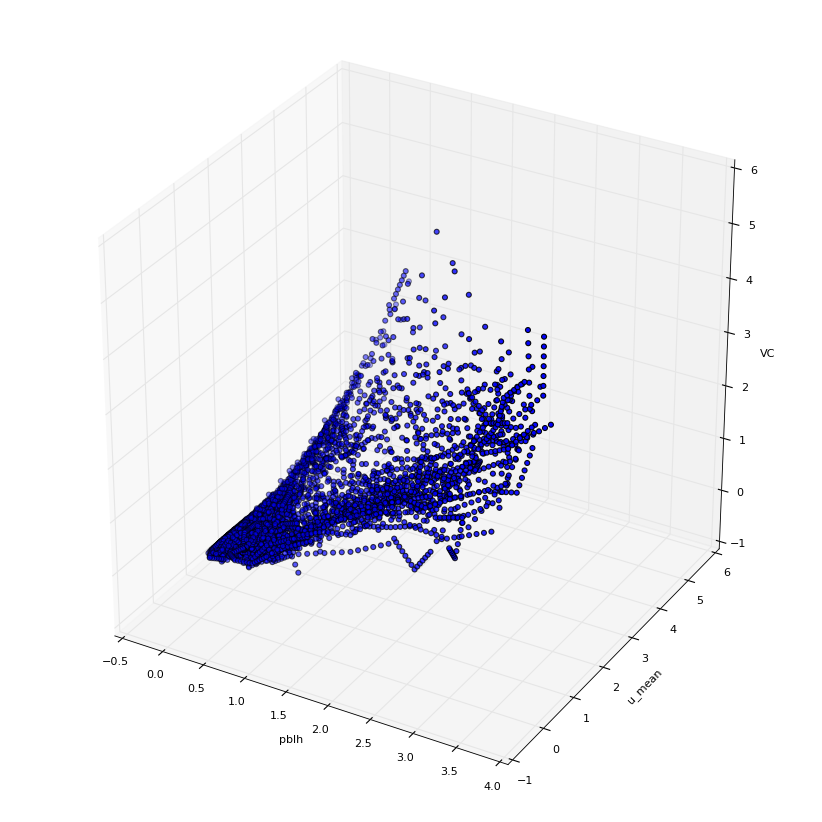

In [34]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.scatter(mayo_adim['pblh_24'], mayo_adim['u_mean_24'], mayo_adim['VC_24'], label='parametric curve')
ax.set_ylabel('u_mean')
ax.set_xlabel('pblh')
ax.set_zlabel('VC')

plt.show()


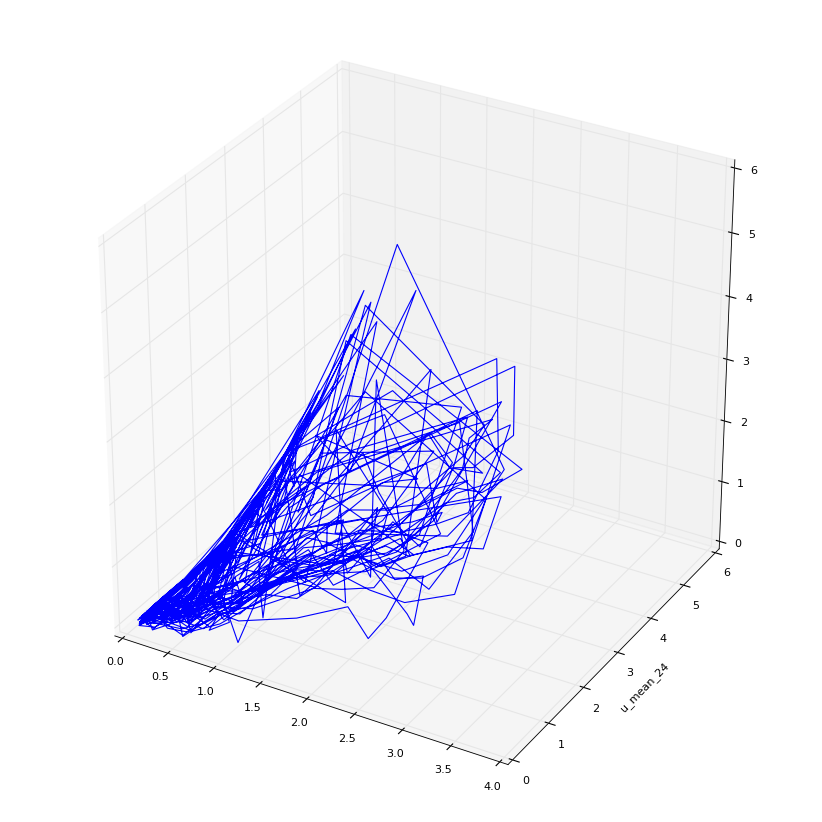

In [35]:
fig = plt.figure(figsize = (13,13))

ax = fig.gca(projection='3d')

ax.plot(mayo_adim['pblh_24'], mayo_adim['u_mean_24'], mayo_adim['VC_24'], label='parametric curve')
ax.set_ylabel('u_mean_24')

plt.show()


In [17]:
pd.Series.interpolate

<function pandas.core.generic.NDFrame.interpolate>

In [18]:
new_index

DatetimeIndex(['2015-05-01 00:00:00', '2015-05-01 00:10:00',
               '2015-05-01 00:20:00', '2015-05-01 00:30:00',
               '2015-05-01 00:40:00', '2015-05-01 00:50:00',
               '2015-05-01 01:00:00', '2015-05-01 01:10:00',
               '2015-05-01 01:20:00', '2015-05-01 01:30:00',
               ...
               '2015-05-30 22:30:00', '2015-05-30 22:40:00',
               '2015-05-30 22:50:00', '2015-05-30 23:00:00',
               '2015-05-30 23:10:00', '2015-05-30 23:20:00',
               '2015-05-30 23:30:00', '2015-05-30 23:40:00',
               '2015-05-30 23:50:00', '2015-05-31 00:00:00'],
              dtype='datetime64[ns]', length=4321, freq='10T')